# The Auto-Correlation Function, Cross-Correlation Function, and AR Modeling

__Overview__: This lab is meant to improve your understanding of the ARMA model and the correlation functions we've been discussing in class.

__Goals__: Students should:

1. Be able to generate a time series drawn from a white noise process and an AR process.
2. Be able to calculate the auto-correlation function and interpret the partial auto-correlation function.
3. Be able to conduct a Bayesian MLE estimate of AR process parameters.

In [3]:
from typing import Any, Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform
from scipy.optimize import minimize
from statsmodels.tsa.stattools import acf, pacf

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Part I:  Auto-Correlation Function

Start by implementing the auto-correlation function. __You should implement the equation from scratch using only simple numpy function like sum / mean / etc. Do not use a library that calculates the covariance or correlation function.__

In [7]:
def acf_impl(x_t: np.ndarray, n_lags: int) -> np.ndarray:
    """Calculate the estimated ACF function for a time series.

    Args:
        x_t: Time series to calculate ACF on.
        n_lags: Number of time steps back in time to calculate the ACF on.

    Returns:
        The estimated ACF for the time series, with the first value being the 
        correlation function (ACF(0)).
    """
    # TODO: write your code here.
    x_t_mean = np.mean(x_t)
    x_t_centered = x_t - x_t_mean

    variance = np.sum(x_t_centered ** 2)
    acf = np.zeros(n_lags + 1)

    for lag in range(n_lags + 1):
       
        covariance = np.sum(x_t_centered[:-lag or None] * x_t_centered[lag:])
        acf[lag] = covariance / variance


    return acf

Now we can run our function on white noise and make sure we get the right result.

$$w_t \sim N(0, \sigma^2)$$

To do this you will have to:

1. Generate white noise with $\sigma$ = 1 and sample size n = 500 from the process above.
2. Calculate the sample ACF up to lag = 20.
4. Calculate the analytical ACF.

In [8]:
# Use this variable name for the test to work
n_lags = 20
mean = 0.0
std = 1.0
n = 500

# 1 - Generate realizations from the white noise process.
w_t = np.random.normal(mean, std, n)

# 2 - Calculate the sample ACF with lag of 20 (you already did the hard work).
acf_estim_yours = acf_impl(w_t, n_lags)

# 3 - Calculate the analytical ACF. This shouldn't be too many lines of code.
acf_analytical = np.zeros(n_lags + 1)
acf_analytical[0] = 1

# Let's check your implementation
acf_estim_statsm = acf(w_t, nlags=n_lags)
np.testing.assert_array_almost_equal(acf_estim_statsm, acf_estim_yours)

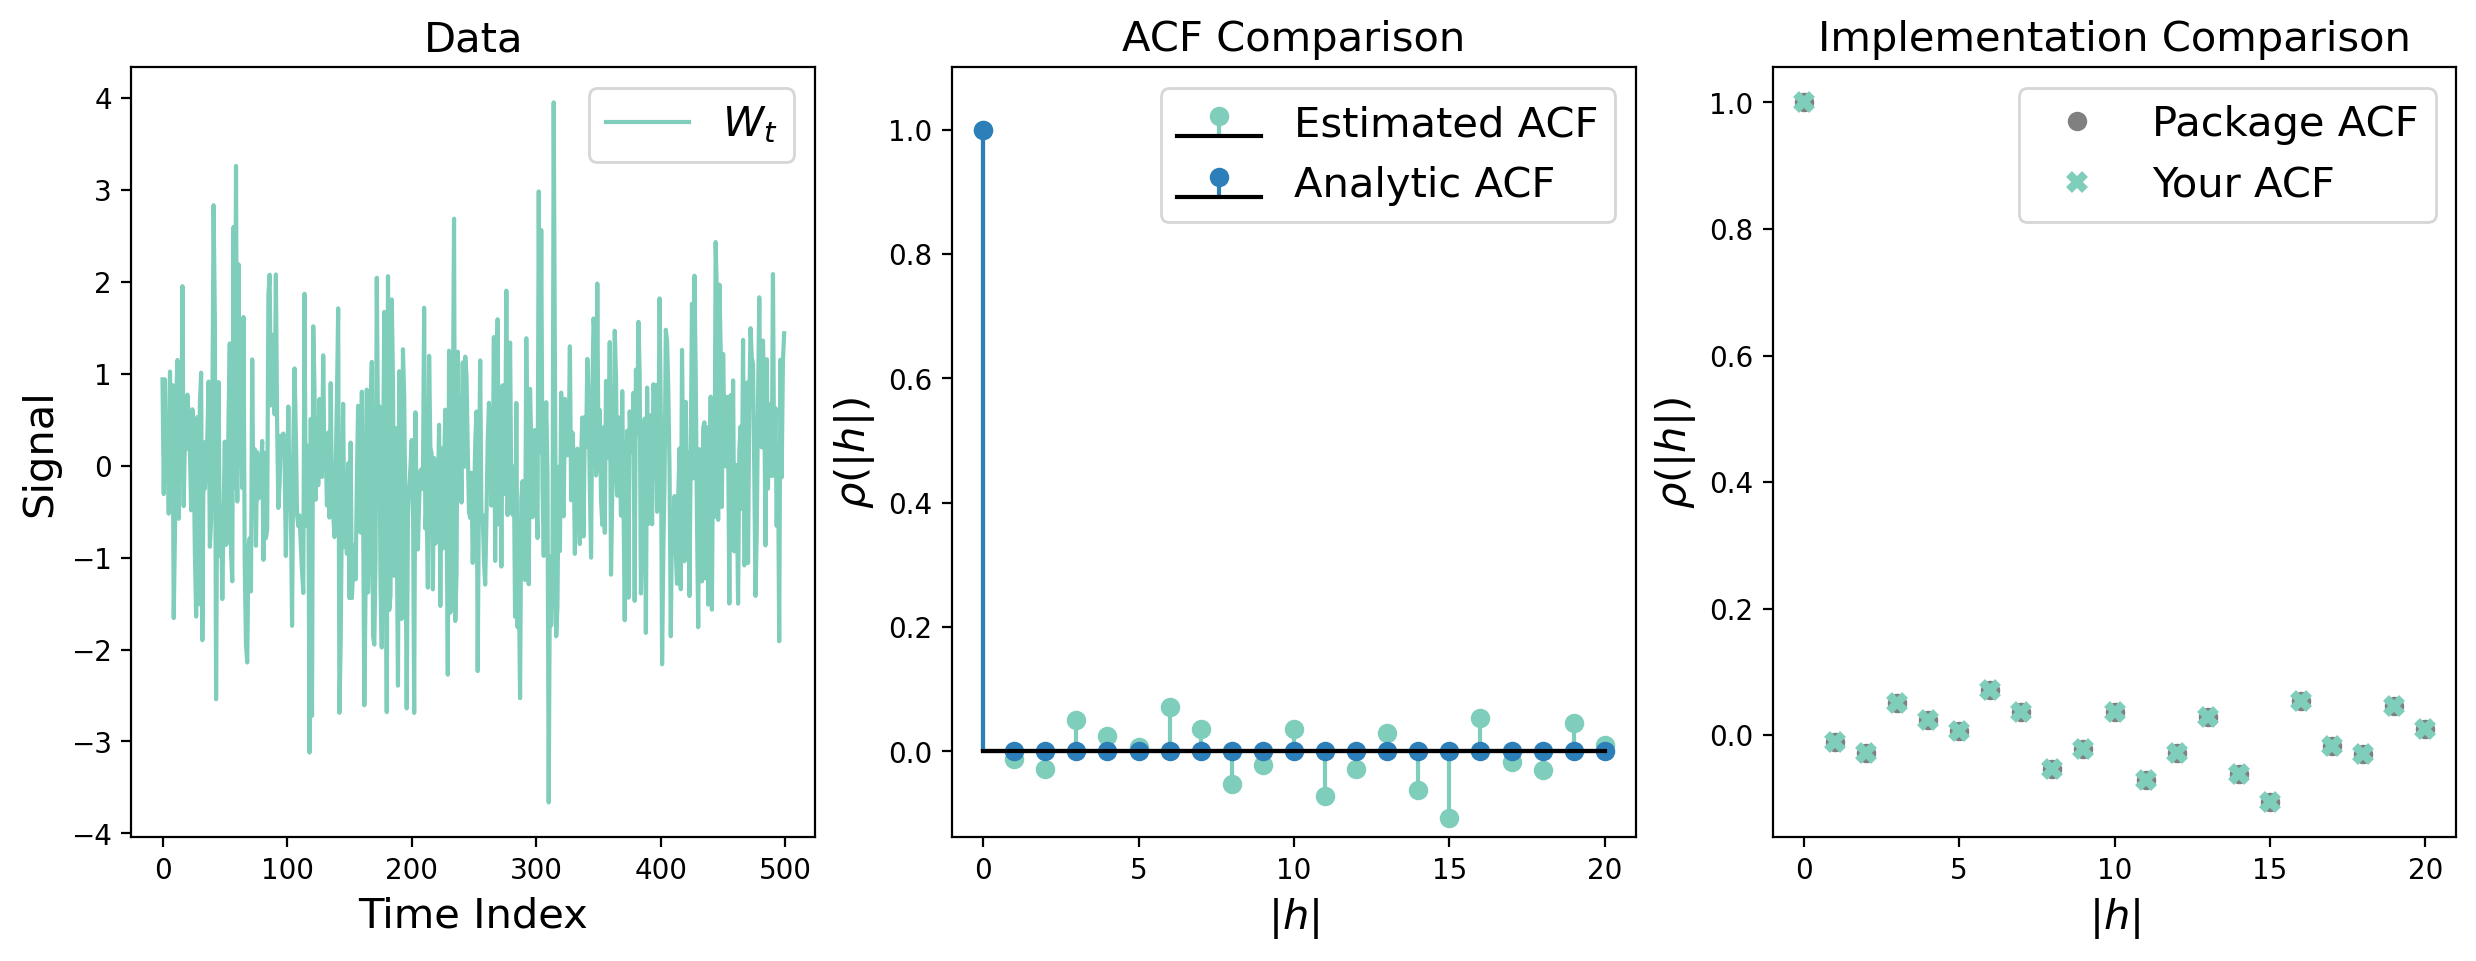

In [9]:
# Now sit back and let the plotting functions visualize the different quantities.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=200)
fontsize = 15
colors = ['#7fcdbb', '#2c7fb8']

# Plot our white noise.
ax1.plot(w_t, label=r'$W_t$', color=colors[0])
ax1.set_title('Data', fontsize=fontsize)
ax1.set_xlabel('Time Index', fontsize=fontsize)
ax1.set_ylabel('Signal', fontsize=fontsize)
ax1.legend(fontsize=fontsize)

# Plot comparison between analytic and estiamted.
ax2.stem(acf_estim_yours, linefmt=colors[0], markerfmt=colors[0], basefmt='k', label='Estimated ACF')
ax2.stem(acf_analytical, linefmt=colors[1], markerfmt=colors[1], basefmt='k', label='Analytic ACF')
ax2.set_ylim([1.3*min(acf_estim_yours), 1.1*(std**2)])
ax2.set_title('ACF Comparison', fontsize=fontsize)
ax2.set_xlabel(r'$|h|$', fontsize=fontsize)
ax2.set_ylabel(r'$\rho(|h|)$', fontsize=fontsize)
ax2.legend(fontsize=fontsize)

# Plot comparison between our estimate and the library estimate.
acf_val_impl = acf_impl(x_t=w_t, n_lags=n_lags)
ax3.plot(acf_estim_statsm, 'o', color='grey', label='Package ACF')
ax3.plot(acf_estim_yours, 'x', ms=6, mew=3, color=colors[0], label='Your ACF')
ax3.legend(fontsize=fontsize)
ax3.set_xlabel(r'$|h|$', fontsize=fontsize)
ax3.set_ylabel(r'$\rho(|h|)$', fontsize=fontsize)
ax3.set_title('Implementation Comparison', fontsize=fontsize)

plt.show()

Now imagine that instead of having a time series with 500 data points, we only had 50. How would you expect the estimated ACF to change? Write you answer below:

Since our current model is only based on white noise, I don't expect number of time steps to influence estimated ACF much. However, I do expect higher fluctuation in general trend in our estimated ACF because we have a shorter sequence and thus less information. 

Now that you've registered your guess, let's try it out. Repeat the steps from above:

1. Generate white noise with $\sigma$ = 1 and sample size n = 50 from the process.
2. Calculate the sample ACF up to lag = 20.

In [13]:
# Use this variable name for the test to work
n_lags = 20
mean = 0.0
std = 1.0
n = 50

# 1 - Generate realizations from the white noise process.
w_t_short = np.random.normal(mean, std, n)

# 2 - Calculate the sample ACF with lag of 20 (you already did the hard work).
acf_estim_yours = acf(w_t_short, nlags=n_lags)

# Let's check your implementation again.
acf_estim_statsm = acf(w_t_short, nlags=n_lags)
np.testing.assert_array_almost_equal(acf_estim_statsm, acf_estim_yours)

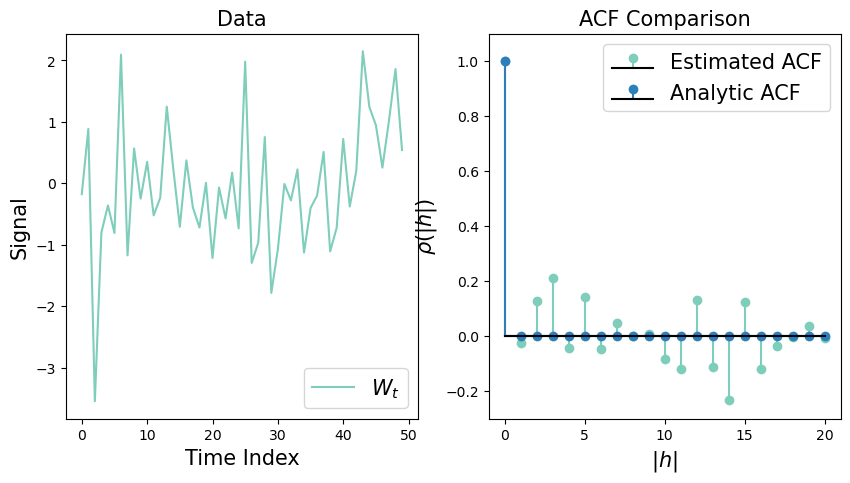

In [14]:
# Now sit back and let the plotting functions visualize the different quantities.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
fontsize = 15
colors = ['#7fcdbb', '#2c7fb8']

# Plot our white noise.
ax1.plot(w_t_short, label=r'$W_t$', color=colors[0])
ax1.set_title('Data', fontsize=fontsize)
ax1.set_xlabel('Time Index', fontsize=fontsize)
ax1.set_ylabel('Signal', fontsize=fontsize)
ax1.legend(fontsize=fontsize)

# Plot comparison between analytic and estimated.
ax2.stem(acf_estim_yours, linefmt=colors[0], markerfmt=colors[0], basefmt='k', label='Estimated ACF')
ax2.stem(acf_analytical, linefmt=colors[1], markerfmt=colors[1], basefmt='k', label='Analytic ACF')
ax2.set_ylim([1.3*min(acf_estim_yours), 1.1])
ax2.set_title('ACF Comparison', fontsize=fontsize)
ax2.set_xlabel(r'$|h|$', fontsize=fontsize)
ax2.set_ylabel(r'$\rho(|h|)$', fontsize=fontsize)
ax2.legend(fontsize=fontsize)

plt.show()

What is happening in the plot above?

I runned these cells several times and noticed that for high probability our estimated ACF flucuates from a positive value to a negative value and has high variability. We cannot say our estimated ACF converges to 0 from the above graph. But in the end these estimatations are only generated based on white noise, which does not include much information from previous time steps. 

## Part II: Auto-Correlation Function for AR(2)

The auto-correlation function of white noise is somewhat trivial, what about a more interesting process? Let's take an AR(2) process of the form:

$$X_{t} = \phi_1 X_{t-1} + \phi_2 X_{t-2} + W_t$$

We can generate the same plots as before, but we will have to:

1. Generate samples for the AR(2) process. Assume the boundary condition that $X_0 = W_0$ and $X_1 = \phi_1 X_0 + W_1$. Also assume that $W_t$ is the same white noise process from above, $\phi_1 = 0.5$, and $\phi_2 = 0.2$. Create a sample size of n=500.
2. Calculate the sample ACF up to lag = 20.
3. You don't need to calculate the analytic ACF. We will save that for the homework.

In [16]:
def ar_two(phi_one: float, phi_two: float, n_samps: int, sigma_w: Optional[float] = 1) -> np.ndarray:
    """Generate samples from an AR(2) process.

    Args:
        phi_one: First constant of the AR(2) process.
        phi_two: Second constant of the AR(2) process.
        n_samps: Number of samples to draw.

    Returns:
        Samples from the AR(2) process.

    Notes:
        Assumes X_0 = W_0, X_1 = phi_1 X_0 + W_1, and that W_t ~ N(0,1)
    """

    x = np.zeros(n_samps)
    w = np.random.normal(0, sigma_w, n_samps)
  
    x[0] = w[0]
    x[1] = phi_one * x[0] + w[1]
    
    for i in range(2, n_samps):
        x[i] = phi_one * x[i-1] + phi_two * x[i-2] + w[i]

    return x

In [17]:
# Let's check your function against a reference value:
np.random.seed(1)
test_implementation = ar_two(0.1, 0.1, 5)
reference_value = np.array([1.62434536, -0.44932188, -0.4106694, -1.15896775, 0.70844391])
np.testing.assert_array_almost_equal(test_implementation, reference_value, decimal=5)

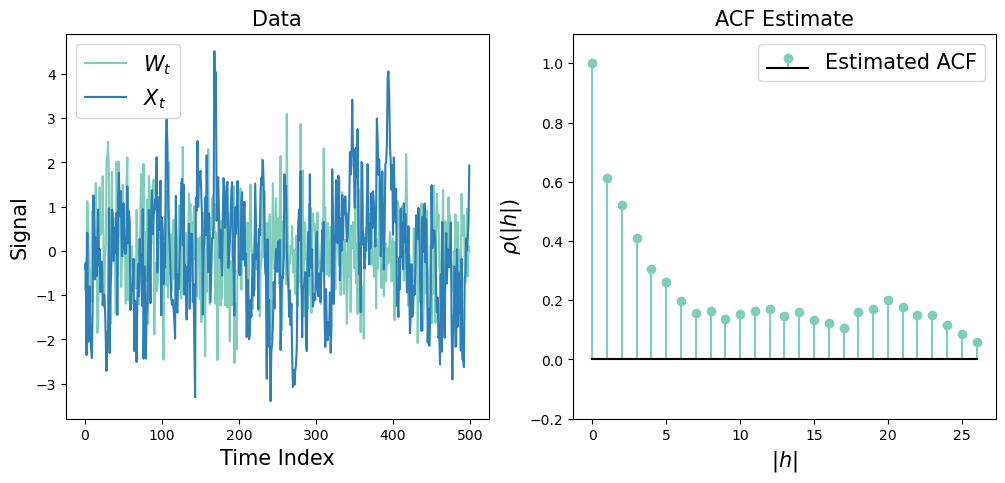

In [21]:
from statsmodels.tsa.stattools import acf
n_lags = 20
np.random.seed(2)

phi_one = 0.5
phi_two = 0.2

# 1. Generate the samples using the function above.
x_t = ar_two(phi_one, phi_two, 500)

# 2. Calculate the sample ACF.
acf_estim_yours = acf(x_t, n_lags)

# Now sit back and let the plotting functions visualize the different quantities.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
fontsize = 15
colors = ['#7fcdbb', '#2c7fb8']

# Plot our white noise.
ax1.plot(w_t, label=r'$W_t$', color=colors[0]) # This is not the same white noise realization as was used for X_t, it's just here for illustration.
ax1.plot(x_t, label=r'$X_t$', color=colors[1])
ax1.set_title('Data', fontsize=fontsize)
ax1.set_xlabel('Time Index', fontsize=fontsize)
ax1.set_ylabel('Signal', fontsize=fontsize)
ax1.legend(fontsize=fontsize)

# Plot comparison between analytic and estiamted.
ax2.stem(acf_estim_yours, linefmt=colors[0], markerfmt=colors[0], basefmt='k', label='Estimated ACF')
ax2.set_ylim([-0.2, 1.1])
ax2.set_title('ACF Estimate', fontsize=fontsize)
ax2.set_xlabel(r'$|h|$', fontsize=fontsize)
ax2.set_ylabel(r'$\rho(|h|)$', fontsize=fontsize)
ax2.legend(fontsize=fontsize)

plt.show()

## Part III: Partial Auto-Correlation Function for AR(2)

While it's clear that the auto-correlation function is more complex for AR(2) than for white noise, it would be hard for us to identify this as an AR(2) process from the auto-correlation function alone. As we discussed in lecture, we can instead use the partial auto-correlation function to achieve this. Implementing the PACF is more involved than what is appropriate for this lab, but we can use the library implementation.

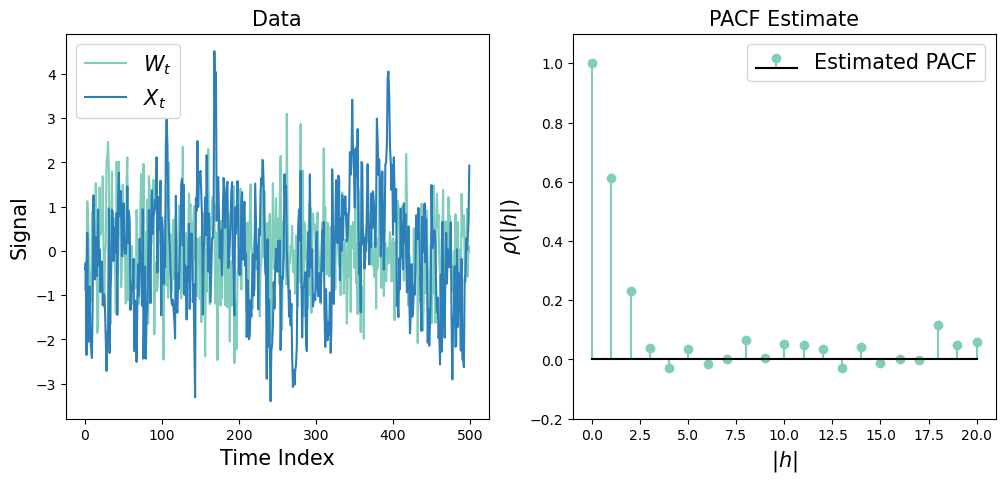

In [22]:
n_lags = 20

pacf_estim = pacf(x_t, n_lags)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
fontsize = 15
colors = ['#7fcdbb', '#2c7fb8']

# Plot our white noise.
ax1.plot(w_t, label=r'$W_t$', color=colors[0]) # This is not the same white noise realization as was used for X_t, it's just here for illustration.
ax1.plot(x_t, label=r'$X_t$', color=colors[1])
ax1.set_title('Data', fontsize=fontsize)
ax1.set_xlabel('Time Index', fontsize=fontsize)
ax1.set_ylabel('Signal', fontsize=fontsize)
ax1.legend(fontsize=fontsize)

# Plot comparison between analytic and estiamted.
ax2.stem(pacf_estim, linefmt=colors[0], markerfmt=colors[0], basefmt='k', label='Estimated PACF')
ax2.set_ylim([-0.2, 1.1])
ax2.set_title('PACF Estimate', fontsize=fontsize)
ax2.set_xlabel(r'$|h|$', fontsize=fontsize)
ax2.set_ylabel(r'$\rho(|h|)$', fontsize=fontsize)
ax2.legend(fontsize=fontsize)

plt.show()

What about this PACF plot suggests that the process is AR(2)?

PACF shows the correlation between step $X_t$ and $X_{t-h}$. So as shown in the graph, it is high in the first several steps and suddenly drops. This corresponds to AR(2) process because the process is primarily influcend by the first two steps.

## Part IV: Modeling an AR(2) Process

The plots above help us understand what type of model would be approriate for our data. Of course, in practice, we know that this data is AR(2). The next question is how to model the data and use that model to make predictions about future time steps. In the section you will:

1. Implement the posterior functions for an AR(2) process given a prior on the parameters.
2. Use the posterior fuction to fit the Maximum a posteriori estimate of the AR(2) process parameters.
3. Visualize how well those parameters predict future data. 

The overall goal will be to conduct Bayesian inference. Remember from Lecture 2 that in Bayesian inference we have one quantity of interest, _the posterior of the parameters given the data_, and to calculate it we will need _the prior on the parameters_ and _the likelihood of the data_. The _marginal of the data_ also shows up in our equation, but it is a normalizing factor that does not depend on the parameters of interest. When we are trying to find the maximum a posteriori estimate of our parameter values we can ignore it.

First we'll need to specify prior for our AR(2) parameters. There are three free parameters to our version of the model, $\phi_1$, $\phi_2$, and $\sigma_w$. We know that large values of $\phi_1$ and $\phi_2$ are unlikely (they will violate causality), so we will set a Gaussian prior for both of them of the form:
$$p(\phi_1) = p(\phi_2) = \mathcal{N}(0 , \sigma_\phi^2).$$
For the standard deviation of the white noise, we have less intuition, but we do know that it must be positive. Therefore, a reasonable distribution that captures our prior understanding is a uniform distribution that is bounded below by 0:
$$p(\sigma_w) = \mathrm{Unif}[0,\sigma_\mathrm{max}].$$
1. __Implement a prior function in the class below that return the log prior:__

 $$\log p(\phi_1, \phi_2, \sigma_w) = \log[p(\phi_1) p(\phi_2) p(\sigma_w)] = \log[p(\phi_1)] + \log[p(\phi_2)] + \log[p(\sigma_w)].$$

Next, we'll need to define the likelihood of the data given a specific set of parameters. We reviewed this equation in class for an ARMA process. Remember the boundary conditions of our problem.

2. __Implement the log likelihood function of the data given the parameters.__

Finally we need to implement the posterior given the prior and the likelihood. This should be simple, but if you're confused about the equation refer to the lecture notes.

3. __Implement the log posterior function of the parameters given the data.__


In [47]:
from scipy.stats import norm
class ARTwoModel:
    """Class implementing prior, likelihood, posterior, and predictions for an AR(2) model.

    Args:
        sigma_phi: Sigma for the prior on parameters phi_1 and phi_2.
        sigma_max: Maximum value for uniform prior on sigma_w.
    """

    def __init__(self: Any, sigma_phi: float, sigma_max: float):
        """Initialization funciton. See class docstring for parameters."""
        self.sigma_phi = sigma_phi
        self.sigma_max = sigma_max

    def log_prior(self: Any, params: np.ndarray) -> float:
        """Calculate the log prior of the parameters.

        Args:
            params: Parameters in the order [phi_1, phi_2, sigma_w]

        Returns:
            Log prior of the parameters.

        Notes:
            You can use the norm and uniform functions to evaluate the log pdf. These functions come from scipy.stats.
        """

        phi_1, phi_2, sigma_w = params

        log_prior_phi_1 = norm.logpdf(phi_1, 0, self.sigma_phi)
        log_prior_phi_2 = norm.logpdf(phi_2, 0, self.sigma_phi)

        if sigma_w < self.sigma_max:
            log_prior_sigma_w = uniform.logpdf(sigma_w, loc=0, scale=self.sigma_max)
        else:
            log_prior_sigma_w = float('-inf')
  

        return log_prior_phi_1 + log_prior_phi_2 + log_prior_sigma_w

    def log_likelihood(self, data: np.ndarray, params: np.ndarray) -> float:
        """Calculate the log likelihood of the data given the parameters.

        Args:
            data: Observed time series.
            params: Parameters in the order [phi_1, phi_2, sigma_w]

        Returns:
            Log likelihood of the data given the parameters.
        """
        phi1 = params[0]
        phi2 = params[1]
        sigma = params[2]
        n = len(data)
        likelihood = 0

        likelihood += norm.logpdf(data[0], loc=0, scale=sigma)
        likelihood += norm.logpdf(data[1], loc=phi1 * data[0], scale=sigma)

        for i in range(2, n):
            mean = phi1 * data[i-1] + phi2 * data[i-2]
            likelihood += norm.logpdf(data[i], loc=mean, scale=sigma)
        
        return likelihood

    def log_posterior(self: Any, params: np.ndarray, data: np.ndarray) -> float:
        """Calcualte the log posterior of the parameters given the data.

        Args:
            params: Parameters in the order [phi_1, phi_2, sigma_w]
            data: Observed time series.

        Returns:
            Log posterior of the parameters given the data.

        Notes:
            Ignore the marginal of the data (the overall normalization of the posterior).
        """
        log_prior_value = self.log_prior(params)
        if log_prior_value == -np.inf:
            return -np.inf
        
        log_likelihood_value = self.log_likelihood(data, params)

        return log_prior_value + log_likelihood_value
        

In [49]:
# Let's run some tests to make sure the implementations are correct.
a_model = ARTwoModel(2.0, 5.0)

phi_one, phi_two = 0.7, 0.2
sigma_w = 2.0
params_test = np.array([phi_one, phi_two, sigma_w])
x_t = np.array([3.52810469, 3.2699877, 4.9520883, 8.60224575, 10.74710566, 7.28886735, 9.15180511, 7.56132263, 6.91684916, 7.17525595])

np.testing.assert_almost_equal(a_model.log_prior([0.3, 0.4, 2.0]), -4.864859339963337)
np.testing.assert_almost_equal(a_model.log_prior([0.3, 0.4, 6.0]), -np.inf)
np.testing.assert_almost_equal(a_model.log_likelihood(x_t, params_test), -23.520459141643073)
np.testing.assert_almost_equal(a_model.log_posterior(params_test, x_t), -28.420318481606408)

With our posterior in hand we can now use it to extract our maximum a posteriori estimate. We will use a numerical optimizer from scipy. We will test the posteriors we get as a function of two axes:
1. The choice of prior. In reality you would only ever select one prior, but this will give us intuition into how important the prior can be in Bayesian inference. Our prior choices will be $\sigma_\mathrm{max} = 50.0, \sigma_\phi = 20.0$ (a wide prior) and $\sigma_\mathrm{max} = 5.0, \sigma_\phi = 0.2$ (a narrow prior).
2. The length of the data. We will simulate 10000 datapoint, but we will compare the results for subset of the data.

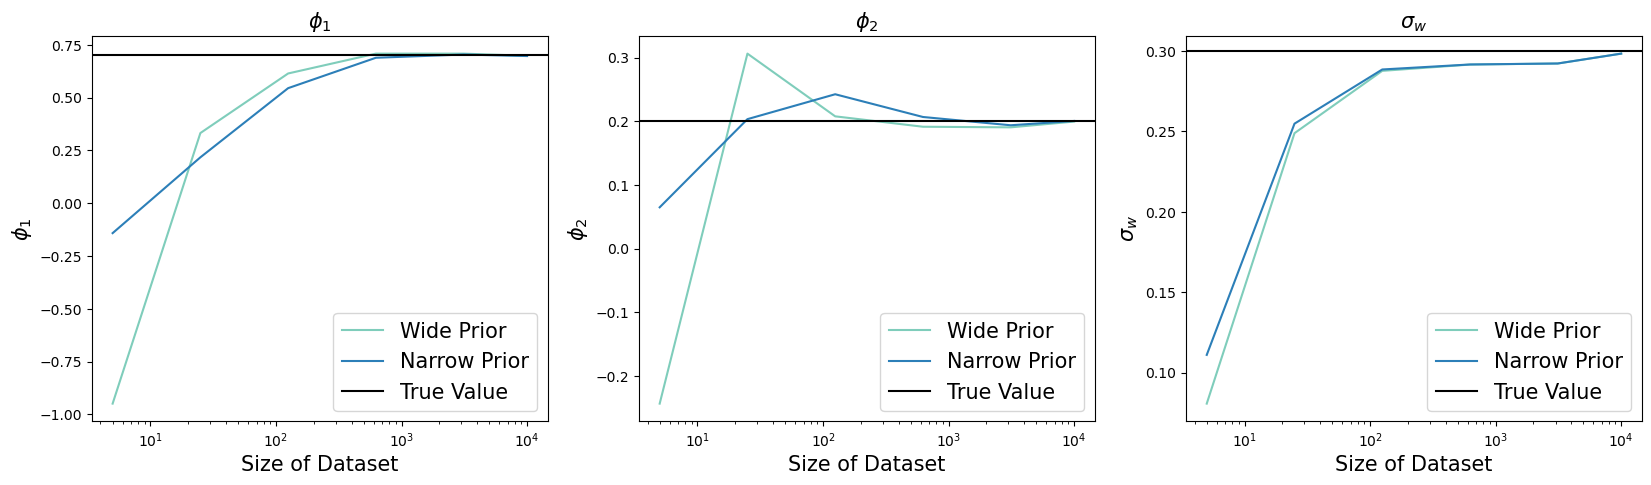

In [50]:
# Let's start with out first prior. Let's make it fairly broad in both parameters.
sigma_phi = 20.0
sigma_max = 50.0
a_model_wide = ARTwoModel(sigma_phi, sigma_max)

# Generate our data
n_samps_data = 10000
phi_one, phi_two = 0.7, 0.2
sigma_w = 0.3
np.random.seed(4)
x_t = ar_two(phi_one, phi_two, n_samps_data, sigma_w)

# We want the maximum but have a minimizer. So we will just minimize the negative of the log posterior (often called the
# negative log posterior). Start with an initial guess of zero for the phis and 1 for sigma_w.
params_zero = np.array([0.0, 0.0, 1.0])
data_lengths = [5, 25, 125, 625, 3125, 10000]
results_wide = []
for data_length in data_lengths:
    res = minimize(lambda params: -a_model_wide.log_posterior(params, x_t[:data_length]), params_zero, method='nelder-mead', 
                   options={'xatol': 1e-8, 'disp': False})
    results_wide.append(res.x)
results_wide = np.array(results_wide)

# Lets repeat the process for our narrow prior
sigma_phi = 0.2
sigma_max = 50.0
a_model_narrow = ARTwoModel(sigma_phi, sigma_max)
params_zero = np.array([0.0, 0.0, 1.0])
results_narrow = []
for data_length in data_lengths:
    res = minimize(lambda params: -a_model_narrow.log_posterior(params, x_t[:data_length]), params_zero, method='nelder-mead', 
                   options={'xatol': 1e-8, 'disp': False, 'maxiter': 10000})
    results_narrow.append(res.x)
results_narrow = np.array(results_narrow)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), dpi=100)
fontsize = 15
colors = ['#7fcdbb', '#2c7fb8']

# Plot our results
ax1.plot(data_lengths, results_wide[:,0], label='Wide Prior', color=colors[0])
ax1.plot(data_lengths, results_narrow[:,0], label='Narrow Prior', color=colors[1])
ax1.set_xscale('log')
ax1.axhline(phi_one, c='k', label='True Value')
ax1.set_title(r'$\phi_1$', fontsize=fontsize)
ax1.set_xlabel(r'Size of Dataset', fontsize=fontsize)
ax1.set_ylabel(r'$\phi_1$', fontsize=fontsize)
ax1.legend(fontsize=fontsize)

# Plot our results
ax2.plot(data_lengths, results_wide[:,1], label='Wide Prior', color=colors[0])
ax2.plot(data_lengths, results_narrow[:,1], label='Narrow Prior', color=colors[1])
ax2.set_xscale('log')
ax2.axhline(phi_two, c='k', label='True Value')
ax2.set_title(r'$\phi_2$', fontsize=fontsize)
ax2.set_xlabel(r'Size of Dataset', fontsize=fontsize)
ax2.set_ylabel(r'$\phi_2$', fontsize=fontsize)
ax2.legend(fontsize=fontsize)

# Plot our results
ax3.plot(data_lengths, results_wide[:,2], label='Wide Prior', color=colors[0])
ax3.plot(data_lengths, results_narrow[:,2], label='Narrow Prior', color=colors[1])
ax3.set_xscale('log')
ax3.axhline(sigma_w, c='k', label='True Value')
ax3.set_title(r'$\sigma_w$', fontsize=fontsize)
ax3.set_xlabel(r'Size of Dataset', fontsize=fontsize)
ax3.set_ylabel(r'$\sigma_w$', fontsize=fontsize)
ax3.legend(fontsize=fontsize)

plt.show()

How much does our choice of prior matter? Where does it matter the most?

Choice of prior influences our parameters heavily when size of dataset is small, where wide priors lead to high flutuating estimates and low priors lead to more stable estimates. When the dataset is small, narrow priors give a closer estimate comparing to the true parameter.

Let's use our fit model for prediction! Our distribution of interest is:
$$p(X_{t+1:t+n}|X_{1:t},\phi_1,\phi_2,\sigma_w).$$
To visualize our predictions, we can either sample from this distribution or we can plot its mean and variance. The mean and variance of an AR(2) process is a bit involved, so here we'll just focus on drawing samples. You will:
1. Write code to sample from the conditional distribution.

In [51]:
def sample_x_future(data: np.ndarray, params: np.ndarray, n_future: int) -> np.ndarray:
    """Sample from the posterior of X_{t+1:t+n} given X_{1:t} and the parameters of our AR(2) process.

    Args:
        data: Observed time series up to time t.
        params: Parameters in the order [phi_1, phi_2, sigma_w]
        n_future: How many steps in the future to sample.

    Returns:
        Sample of X_{t+1:t+n}
    """
    # Extract AR(2) parameters
    phi_1, phi_2, sigma_w = params
    future_samples = np.zeros(n_future)
    
    # Get the last two observed values to start the prediction
    last_x1 = data[-1]      
    last_x2 = data[-2]     

    # Generate future values using the AR(2) recurrence relation
    for i in range(n_future):
        noise = np.random.normal(0, sigma_w)
        
        # Predict the next value based on the AR(2) process
        next_value = phi_1 * last_x1 + phi_2 * last_x2 + noise
        
        # Store the generated value in future_samples
        future_samples[i] = next_value
        
        # Update last_x2 and last_x1 for the next iteration
        last_x2 = last_x1
        last_x1 = next_value
    
    return future_samples

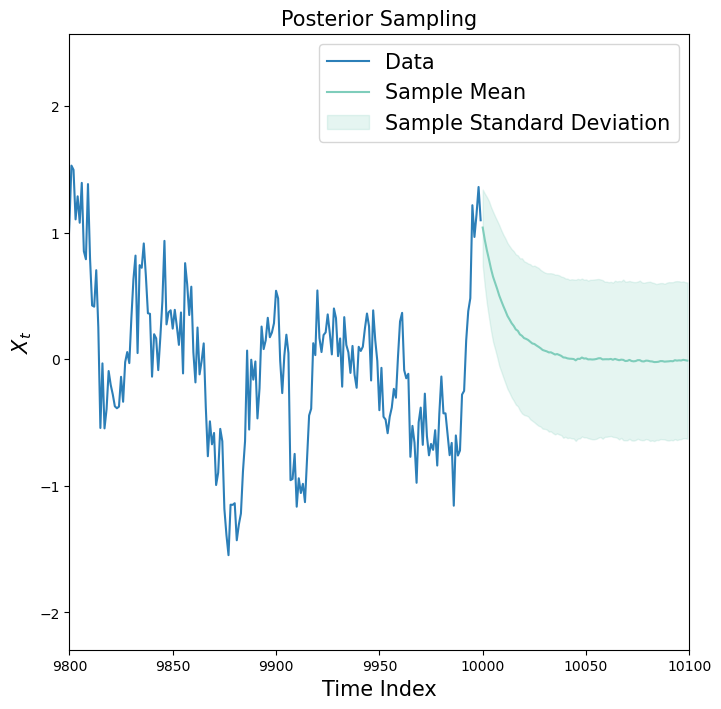

In [52]:
# Let's visualize the predictions being output by our model
n_future = 100
n_samples_posterior = 5000
samples = np.zeros((n_samples_posterior, n_future))
for i in range(n_samples_posterior):
    # Use the full data prediction with the narrow prior as our parameters.
    samples[i] = sample_x_future(x_t, results_narrow[-1], n_future)

t_data = np.arange(n_samps_data)
t_samples = np.arange(n_samps_data, n_samps_data + n_future)
fig = plt.figure(figsize=(8,8), dpi=100)
plt.plot(t_data, x_t, color=colors[1], label='Data')
plt.plot(t_samples, np.mean(samples, axis=0), color=colors[0], label='Sample Mean')
plt.fill_between(t_samples, np.mean(samples, axis=0) - np.std(samples, axis=0), np.mean(samples, axis=0) + np.std(samples, axis=0), 
                color=colors[0], label='Sample Standard Deviation', alpha=0.2)
plt.xlim([n_samps_data-200, n_samps_data + n_future])
plt.ylabel(r'$X_t$', fontsize=fontsize)
plt.xlabel('Time Index', fontsize=fontsize)
plt.title('Posterior Sampling', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

Why does the mean behave the way that it does? What about the standard deviation of the sample? How does this relate to the auto-correlation function?

The mean tends to converge to zero while stand deviation increases as we go further into the future. The behavior of convergence in mean is determined by the structure of a AR(2) process with noise normally distributed, mean zero. Given parameters making the process stationary, future generations are based on only two previous time steps, so the process gradually forgets its initial conditions. 

Yet standard deviation increases because uncertatinty also increases with each new time step. Cumulation in noise also leads to a wider range of possible values. 

At smaller vallues, ACF is high, meaning stonger correlation between values, explaining first estimations having smaller standard deviation. As we deep further into future, ACF decreases, corresponding to higher standard deviation and increasing uncertainty.